
<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 2</b>


Thank you so much for such a good job! This is a hard topic, but everything is great in your project! You can find my new comments with digit 2. I do not have any questions, so the project can be accepted. Good luck! 

    
</div>

# Beta Bank Customer Retention Project

## Introduction
In this project we will investigate Beta Bank's customer behavior. Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.

We need to predict whether a customer will leave the bank soon. To do this we will look at the data on the customers' past behavior and termination of contracts with the bank. We will then build a model with maximum possible F1 score with a score of at least 0.59. We will also take a look at the AUC-ROC metric and compare it to our F1 score.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
import pylab as pl

## Data Preperation

In [3]:
data = pd.read_csv('/datasets/Churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
display(data)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [5]:
print(data.dtypes)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [8]:
data['CustomerId'].duplicated().sum()

0

Data has 13 columns and 10,000 rows.
The `Tenure` column has 909 rows with missing values.
The data type for `Tenure` should be int64 instead of float because it represents years.

In [9]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())
data['Tenure'] = data['Tenure'].astype(int)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Text(0, 0.5, 'Client Frequency')

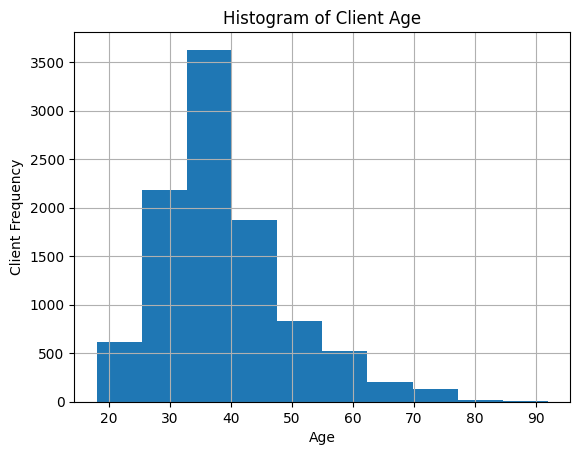

In [11]:
data.hist(column='Age')
pl.title('Histogram of Client Age')
pl.xlabel('Age')
pl.ylabel('Client Frequency')

Text(0, 0.5, 'Balance Frequency')

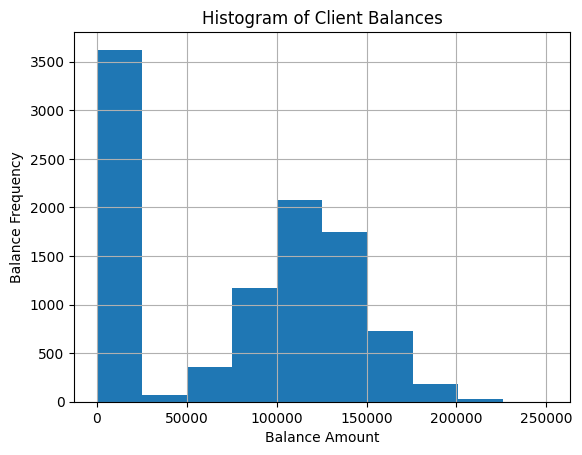

In [12]:
data.hist(column='Balance')
pl.title('Histogram of Client Balances')
pl.xlabel('Balance Amount')
pl.ylabel('Balance Frequency')

Text(0, 0.5, 'Salary Frequency')

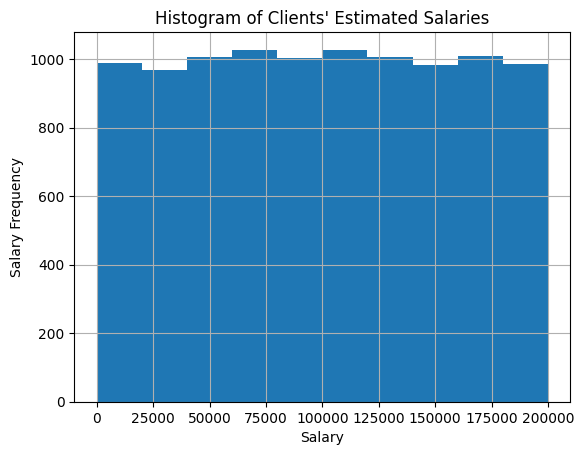

In [13]:
data.hist(column='EstimatedSalary')
pl.title('Histogram of Clients\' Estimated Salaries')
pl.xlabel('Salary')
pl.ylabel('Salary Frequency')

Text(0, 0.5, 'Client Frequency')

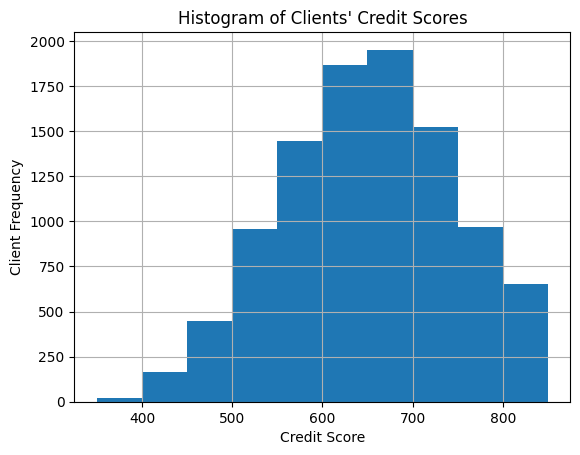

In [14]:
data.hist(column='CreditScore')
pl.title('Histogram of Clients\' Credit Scores')
pl.xlabel('Credit Score')
pl.ylabel('Client Frequency')

## Model Creation
### Label Encoding

In [15]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [16]:
new_data = data.drop(['Surname', 'RowNumber', 'CustomerId'], axis = 1)

In [17]:
encoder = OrdinalEncoder()
data['Geography'] = encoder.fit_transform(data[['Geography']])

In [18]:
data_ordinal = pd.DataFrame(encoder.fit_transform(new_data), columns=new_data.columns)

In [19]:
data_ordinal.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,228.0,0.0,0.0,24.0,2.0,0.0,0.0,1.0,1.0,5068.0,1.0
1,217.0,2.0,0.0,23.0,1.0,743.0,0.0,0.0,1.0,5639.0,0.0
2,111.0,0.0,0.0,24.0,8.0,5793.0,2.0,1.0,0.0,5707.0,1.0
3,308.0,0.0,0.0,21.0,1.0,0.0,1.0,0.0,0.0,4704.0,0.0
4,459.0,2.0,0.0,25.0,2.0,3696.0,0.0,1.0,1.0,3925.0,0.0


Before we train our model, it's better to have string features converted to numerical values.

The surname, rownumber, and customerId columns are deleted from our features because it is unlikely to significantly impact the model's performance even if encoding is applied.

Ordinal encoding is performed because it is more suitable for models with tree-based systems like Decision Tress and Random Forests.

### Target and Features Setup

In [20]:
target = data_ordinal['Exited']
target.shape

(10000,)

In [21]:
features = data_ordinal.drop('Exited', axis=1)
features.shape

(10000, 10)

In [22]:
features_train, features_test, target_train, target_test =train_test_split(features,target,test_size=0.2,random_state=12345)

features_train, features_valid, target_train, target_valid =train_test_split(features_train,target_train,test_size=.25,random_state=12345)

In [23]:
features_train.shape

(6000, 10)

In [24]:
features_valid.shape

(2000, 10)

In [25]:
target_train.shape

(6000,)

In [26]:
target_valid.shape

(2000,)

In [27]:
features_test.shape

(2000, 10)

### Features Scaling

In [28]:
features_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
492,248.0,0.0,0.0,20.0,4.0,639.0,1.0,0.0,1.0,5959.0
6655,163.0,0.0,1.0,26.0,5.0,798.0,0.0,1.0,1.0,2870.0
4287,323.0,1.0,1.0,35.0,1.0,1524.0,0.0,1.0,1.0,3587.0
42,165.0,0.0,0.0,43.0,2.0,2994.0,0.0,1.0,1.0,4724.0
8178,316.0,0.0,0.0,28.0,7.0,3864.0,1.0,1.0,1.0,7331.0


In [29]:
scaler = StandardScaler()
numeric = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','Geography','Gender','HasCrCard','IsActiveMember']
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

print(features_train[numeric])
print(features_valid[numeric])
print(features_test[numeric])

      CreditScore       Age    Tenure   Balance  NumOfProducts  \
492     -0.134724 -0.078018 -0.369113 -0.659901       0.816929   
6655    -1.012686  0.494825 -0.007415 -0.585198      -0.896909   
4287     0.639948  1.354090 -1.454209 -0.244099      -0.896909   
42      -0.992028  2.117882 -1.092511  0.446555      -0.896909   
8178     0.567645  0.685773  0.715982  0.855309       0.816929   
...           ...       ...       ...       ...            ...   
8819    -0.620185 -0.268966  1.801078  0.677243      -0.896909   
1537     1.745146 -1.032757  1.077681 -0.960124      -0.896909   
1408     0.567645 -0.650861  1.439380 -0.960124       0.816929   
7661    -0.413606  0.494825 -1.092511  0.353058      -0.896909   
3295     1.053106 -1.892022  1.439380 -0.960124      -0.896909   

      EstimatedSalary  Geography    Gender  HasCrCard  IsActiveMember  
492          0.335913  -0.905741 -1.103311  -1.550255        0.968496  
6655        -0.734650  -0.905741  0.906363   0.645055        0.

/tmp/ipykernel_31/1925296585.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_test[numeric] = scaler.transform(features_test[numeric])
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

## Training Model

### Random Forest

In [30]:
model_rfc = RandomForestClassifier(random_state=12345, max_depth=8, n_estimators=50)

In [31]:
model_rfc.fit(features_train, target_train)

RandomForestClassifier(max_depth=8, n_estimators=50, random_state=12345)

In [32]:
predict_valid_rfc = model_rfc.predict(features_valid)

In [33]:
accuracy_score(target_valid, predict_valid_rfc)

0.8615

### Decision Tree

In [34]:
model_dt = DecisionTreeClassifier(random_state=12345, max_depth=8)

In [35]:
model_dt.fit(features_train, target_train)

DecisionTreeClassifier(max_depth=8, random_state=12345)

In [36]:
predict_valid_dt = model_dt.predict(features_valid)

In [37]:
accuracy_score(target_valid, predict_valid_dt)

0.8485

### Logistic Regression

In [38]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear')

In [39]:
model_lr.fit(features_valid, target_valid)

LogisticRegression(random_state=12345, solver='liblinear')

In [40]:
predict_valid_lr = model_lr.predict(features_valid)

In [41]:
accuracy_score(target_valid, predict_valid_lr)

0.818

## Class Checking 
### Sanity Check

In [42]:
class_frequency = data_ordinal['Exited'].value_counts(normalize=True)

In [43]:
class_frequency

0.0    0.7963
1.0    0.2037
Name: Exited, dtype: float64

<AxesSubplot:title={'center':'Retained v Exited Customers'}, xlabel='Customer Retention', ylabel='Percentage'>

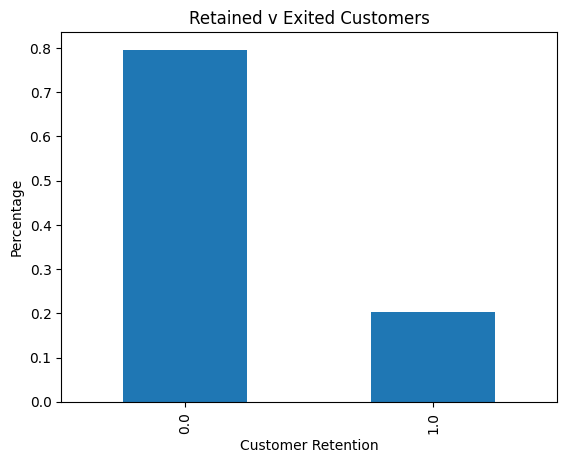

In [49]:
class_frequency.plot(kind='bar', title='Retained v Exited Customers', ylabel='Percentage', xlabel='Customer Retention')

In our Retained v Exited customer's bar chart, we have two values 0 and 1. 0 value counts the amount of customers who are still existing clients. The 1 represents customers who have left the bank. The bank looks to retain about 80% of their clients.

#### Random Forest

In [50]:
predict_valid_rfc = pd.Series(model_rfc.predict(features_valid))

In [51]:
class_frequency1 = predict_valid_rfc.value_counts(normalize=True)

In [52]:
class_frequency1

0.0    0.902
1.0    0.098
dtype: float64

#### Decision Tree

In [53]:
predict_valid_dt = pd.Series(model_dt.predict(features_valid))

In [54]:
class_frequency2 = predict_valid_dt.value_counts(normalize=True)

In [55]:
class_frequency2

0.0    0.879
1.0    0.121
dtype: float64

#### Logistic Regression

In [56]:
predict_valid_lr = pd.Series(model_lr.predict(features_valid))

In [57]:
class_frequency3 = predict_valid_lr.value_counts(normalize=True)

In [58]:
class_frequency3

0.0    0.9455
1.0    0.0545
dtype: float64

## Calculating Constant Prediciton Results

In [59]:
target_pred_constant = pd.Series(0, index=target_valid.index)

In [60]:
accuracy_score(target_valid, target_pred_constant)

0.8045

Conclusion: A sanity check is ran to verify if the model you've created has an accuracy that is close to the benchmark or baseline. From the experiment using the above models we can now draw some conclusions. 

Random Forest: The accuracy for this model was 0.902 for the 0 class. For the 1 class the accuracy was .098. This current model seems to struggle to predict the class 1 effectively. There is a need for a weight adjustment for this model. Considering the model has an overall accuracy of 86%, the difference in the model's predictions for class 0 is only 4%. 

Decision Tree: In this model, an accuracy rate of 85% is achieved for class 0. This accuracy rate is not significantly differently from the model's overall accuracy of 85%. The appearance of class 0 in the model's predictions is also 87%. It's possible that this model is experiencing underfitting. 

Logistic Regression: In this model, an accuracy rate of 94% is achieved for class 0. This accuracy is higher than the model's overall accuracy of 81%. This suggests that the model is only good at predicting class 0. 

## Checking for Imbalance Class

### Confusion Matrix

#### Random Forest

In [61]:
confusion_matrix(target_valid, predict_valid_rfc)

array([[1568,   41],
       [ 236,  155]])

#### Decision Tree 

In [62]:
confusion_matrix(target_valid, predict_valid_dt)

array([[1532,   77],
       [ 226,  165]])

#### Logistic Regression

In [63]:
confusion_matrix(target_valid, predict_valid_lr)

array([[1568,   41],
       [ 323,   68]])

## Recall

#### Random Forest

In [64]:
recall_score(target_valid, predict_valid_rfc)

0.39641943734015345

#### Decision Tree

In [65]:
recall_score(target_valid, predict_valid_dt)

0.4219948849104859

#### Logistic Regression 

In [66]:
recall_score(target_valid, predict_valid_lr)

0.17391304347826086

## Precision

### Random Forest

In [67]:
precision_score(target_valid, predict_valid_rfc)

0.7908163265306123

### Decision Tree

In [68]:
precision_score(target_valid, predict_valid_dt)

0.6818181818181818

### Logistic Regression

In [69]:
precision_score(target_valid, predict_valid_lr)

0.6238532110091743

## F1 Score

### Random Forest

In [70]:
f1_score(target_valid, predict_valid_rfc)

0.5281090289608177

### Decision Tree

In [71]:
f1_score(target_valid, predict_valid_dt)

0.5213270142180094

### Logistic Regression

In [72]:
f1_score(target_valid, predict_valid_lr)

0.272

Random Forest:
- The confusion matrix values indicate that the most frequent value is the True Negative. This suggests that the trained model tends to predict negative values more often.
- The Recall value is close to 0, which means our model is not good at identifying True Positives. This needs improvement. 
- The Precision value here is close to 1. This shows that our model is good at identifying negative values.
- The F1 score using validation data is .52, which is lower than the defined threshold.

Decision Tree:
- The confusion matrix values indicate that the most frequent occuring value is True Negative. This indicates that the trained model often predicts negative values.
- The obtained recall value is .42. The precision value is .68.
- The F1 score is .52. Below the threshold.

Logistic Regression:
- The confusion matrix indicates that the most frequent occuring value is True Negative. This suggests that the trained model tends to predict negative values more.
- The Recall value is .17. The precision value was .62.
- The F1 score is .27. Below our threshold.

Conclusion:

The models' performance falls far short of the given threshold. Each have low precision, recall and F1 scores. With the high imbalance between recall and precision, we will need to give each model significant improvements. 

## Improving Model Quality

### Upsampling & Downsampling Functions

In [73]:
def upsample(features, target, repeat):
    features_zeros = features[target==0]
    features_ones = features[target==1]
    target_zeros = target[target==0]
    target_ones = target[target==1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

In [74]:
def downsample(features,target,fraction):
    feature_one = features[target == 1]
    feature_zero = features[target == 0]
    target_one = target[target == 1]
    target_zero = target[target == 0]
    
    features_downsampled = pd.concat([feature_zero.sample(frac=fraction, random_state=12345)] + [feature_one])
    target_downsampled = pd.concat([target_zero.sample(frac=fraction,random_state=12345)] + [target_one])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled,target_downsampled,random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train,target_train,.1)

### Random Forest Upsample

In [75]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 5)

In [76]:
model_rfc.fit(features_upsampled, target_upsampled)

RandomForestClassifier(max_depth=8, n_estimators=50, random_state=12345)

In [77]:
new_predict_valid_rfc1 = model_rfc.predict(features_valid)

In [78]:
f1_score(target_valid, new_predict_valid_rfc1)

0.5748502994011976

### Random Forest Downsample

In [79]:
model_rfc = RandomForestClassifier(random_state=12345,n_estimators=30,max_depth=7)
model_rfc.fit(features_downsampled, target_downsampled)
predicted_valid = model_rfc.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.4447204968944099


### Decision Tree Upsample

In [80]:
model_dt.fit(features_upsampled, target_upsampled)

DecisionTreeClassifier(max_depth=8, random_state=12345)

In [81]:
new_predict_valid_dt1 = model_dt.predict(features_valid)

In [82]:
f1_score(target_valid, new_predict_valid_dt1)

0.5366795366795367

### Decision Tree Downsample

In [83]:
model_dt = DecisionTreeClassifier(random_state=12345,max_depth=7)
model_dt.fit(features_downsampled, target_downsampled)
predicted_valid = model_dt.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.4555808656036447


### Logistic Regression Upsample

In [84]:
model_lr.fit(features_upsampled, target_upsampled)

LogisticRegression(random_state=12345, solver='liblinear')

In [85]:
new_predict_valid_lr1 = model_lr.predict(features_valid)

In [86]:
f1_score(target_valid, new_predict_valid_lr1)

0.4547528517110266

### Logistic Regression Downsample

In [87]:
model_lr = LogisticRegression(random_state=12345,solver='liblinear')
model_lr.fit(features_downsampled, target_downsampled)
predicted_valid = model_lr.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))


F1: 0.39479392624728854


## Class Weight Adjustment

### Random Forest

In [93]:
# Increase weight
new_model_rf = RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=50, class_weight='balanced')

In [94]:
new_model_rf.fit(features_train, target_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=50,
                       random_state=12345)

In [95]:
new_predict_valid_rf = new_model_rf.predict(features_valid)

In [96]:
f1_score(target_valid, new_predict_valid_rf)

0.5899094437257439

### Decision Tree

In [97]:
new_model_dt = DecisionTreeClassifier(random_state=12345, max_depth=6, class_weight='balanced')

In [98]:
new_model_dt.fit(features_train, target_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=12345)

In [99]:
new_predict_valid_dt = new_model_dt.predict(features_valid)

In [100]:
f1_score(target_valid, new_predict_valid_dt)

0.5622932745314222

### Logistic Regression

In [101]:
new_model_lr = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')

In [102]:
new_model_lr.fit(features_train, target_train)

LogisticRegression(class_weight='balanced', random_state=12345,
                   solver='liblinear')

In [103]:
new_predict_valid_lr = new_model_lr.predict(features_valid)

In [104]:
f1_score(target_valid, new_predict_valid_lr)

0.4648742411101475

Conclusion: 
- Based on the calculations above, the model has improved. We added the upsample method and class weight adjustments to all models. Upsampling is chosen to help the model better recognize positive values since the confusion matrix results indicate that the model is more familiar with negative class than the positive. 

- Class weight adjustment is done to give more weight to the rarely occuring class compared to the frequently occuring class.

- Random Forest was almost able to reach the required threshold. The F1 score reached 57.4% and with the class adjusment added it reached 58.9%. Downsampling decreased the F1 score to 44%.

- The Decision Tree could not reach the required threshold. The upsampling method got an F1 score of 53%. Downsampling got the F1 score to 45%. The weight class adjustment raised the percentage to 56%.

- The Logistic Regression is also unable to reach our threshold. The upsampling method got the F1 score up to 45%, downsampling F1 score was 49% and the weight class adjustment made the F1 score 46%.

### ROC & AUC-ROC

#### Random Forest

In [93]:
prob_valid_rfc = new_model_rf.predict_proba(features_valid)

In [94]:
prob_one_valid_rfc = prob_valid_rfc[:,1]

In [95]:
prob_one_valid_rfc[:10]

array([0.29274084, 0.8663207 , 0.06399526, 0.82535779, 0.88577921,
       0.08741055, 0.09979429, 0.19924019, 0.37896854, 0.2492111 ])

In [96]:
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(target_valid, prob_one_valid_rfc)

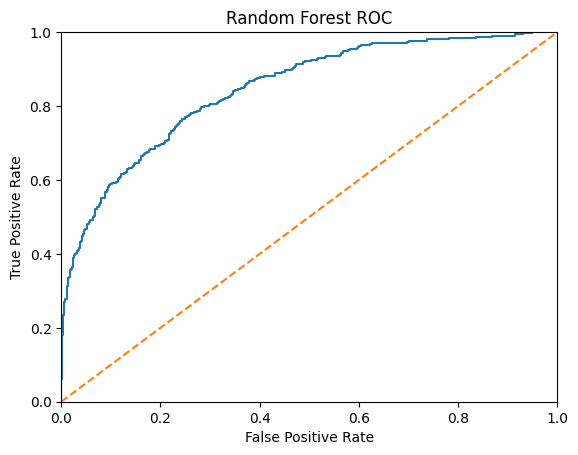

In [97]:
plt.figure()
plt.plot(fpr_rfc, tpr_rfc)
plt.plot([0,1],[0,1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC')
plt.show()

In [98]:
auc_roc_rfc = roc_auc_score(target_valid, prob_one_valid_rfc)

In [99]:
auc_roc_rfc

0.8456079056585479

### Decision Tree

In [100]:
prob_valid_dt = new_model_dt.predict_proba(features_valid)

In [101]:
prob_one_valid_dt = prob_valid_dt[:, 1]

In [102]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(target_valid, prob_one_valid_dt)

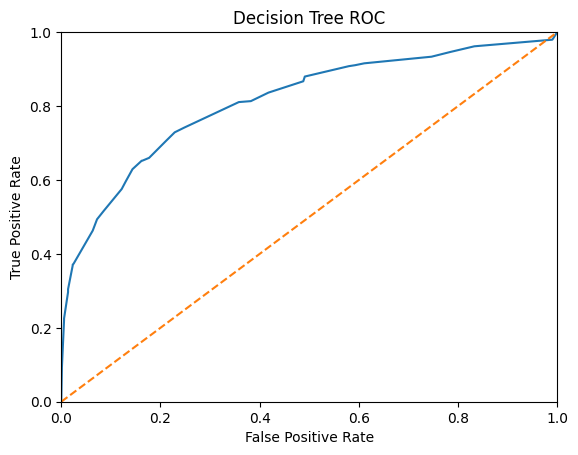

In [103]:
plt.figure()
plt.plot(fpr_dt, tpr_dt)
plt.plot([0,1],[0,1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC')
plt.show()

In [104]:
auc_roc_dt = roc_auc_score(target_valid, prob_one_valid_dt)

In [105]:
auc_roc_dt

0.8125473876961274

### Logisitic Regression

In [106]:
prob_valid_lr = new_model_lr.predict_proba(features_valid)

In [107]:
prob_one_valid_lr = prob_valid_lr[:,1]

In [108]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(target_valid, prob_one_valid_lr)

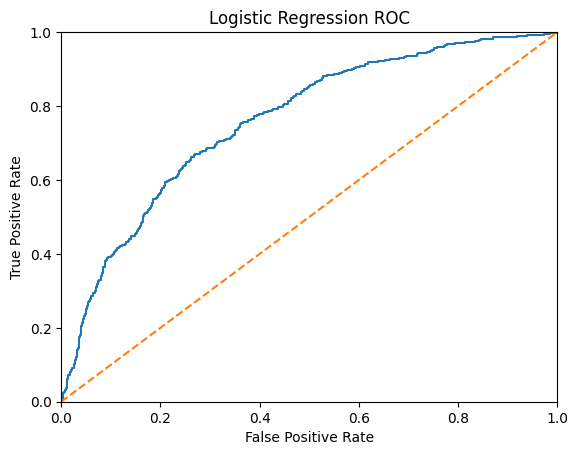

In [109]:
plt.figure()
plt.plot(fpr_lr, tpr_lr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC')
plt.show()

In [110]:
auc_roc_lr = roc_auc_score(target_valid, prob_one_valid_lr)

In [111]:
auc_roc_lr

0.7597163652663487

Conclusion:

- Based on our plots, the model with the best performace is our Random Forest Classifier.
- The model with the lowest performace is the Logistic Regression.
- The AUC-ROC values: Random Forest = 85%, Decision Tree = 83%, Logistic Regression = 75%.

## Final Model Test

In [114]:
model = RandomForestClassifier(random_state=12345,n_estimators=50,max_depth=8)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
print('Accuracy:', accuracy_score(target_test,predicted_test))
print('F1:', f1_score(target_test, predicted_test))
print('AUC-ROC:', roc_auc_score(target_test,predicted_test))

Accuracy: 0.787
F1: 0.6077348066298343
AUC-ROC: 0.7818396208858206


## Conclusion

For this project we completed the following:

   Data Preperation:
   - Handled missing values in the `Tenure` column.
   - Looked at distribution of quantitative columns.

    
   Model Creation:
   - Encoding completed since strings were present in our features
   - Split the data into features and target. Our target column was the `Exited` column since we were identifying customers who left.
   - After transforming the features we continued onto scaling them to standardize them.
   
   Model Training:
   - Random Forest: 
       Had an accuracy of 86% before adding adjustments.
       F1 score was 52% before adjustments. 58.9% after.
       AUC-ROC value was 85%.
       
  - Decision Tree:
      Received the accuracy rate of 84%.
      The F1 score before adjustments was 52%. After upsmapling, 53%. With weight class adjustments, 56%.
      The AUC-ROC value is 81%.
      
  - Logistic Regression:
      81% Accuracy rate.
      F1 score of 27%, very low.
      The AUC-ROC value is 75%. Comparing this to the value of the other models, this will most likely not be the preferred model.
      
      
   Final Model Test:
   - The Random Forest had our highest F1 score so we used this model for our final model test.
   - F1 score: 60%
   - Accuracy: 78%
   - AUC-ROC: 78%
      
      
Conclusion:

The Random Forest model seems to be the best in predicting whether customers stay or not with Beta Bank. This most creates a significan number of True Negatives (0), this shows that many customers are likely to stay. This was most likely because of the number of products used and the activity level of the customers at the bank.
      